In [6]:
# ======================================================
# 1. IMPORT LIBRARIES
# ======================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# ======================================================
# 2. LOAD DATASET
# ======================================================
df = pd.read_csv("Life Expectancy Data.csv", on_bad_lines='skip')
print(df.shape)
df.head()



(635, 1)


,,,,,,,,,,Country;Year;Status;Life expectancy ;Adult Mortality;infant deaths;Alcohol;percentage expenditure;Hepatitis B;Measles ; BMI ;under-five deaths ;Polio;Total expenditure;Diphtheria ; HIV/AIDS;GDP;Population; thinness 1-19 years; thinness 5-9 years;Income composition of resources;Schooling
Afghanistan;2015;Developing;65;263;62;0,01;71,27962362;65;1154;19,1;83;6;8,16;65;0,1;584,25921;33736494;17,2;17,3;0,479;10,1
Afghanistan;2014;Developing;59,9;271;64;0,01;73,52358168;62;492;18,6;86;58;8,18;62;0,1;612,696514;327582;17,5;17,5;0,476;10
Afghanistan;2012;Developing;59,5;272;69;0,01;78,1842153;67;2787;17,6;93;67;8,52;67;0,1;669,959;3696958;17,9;18;0,463;9,8
Afghanistan;2007;Developing;57,5;295;82;0,02;10,91015598;63;1141;15,2;113;63;6,73;63;0,1;369,835796;26616792;19;19,1;0,415;8,4
Afghanistan;2004;Developing;57;293;87;0,02;15,29606643;67;466;13,8;120;5;8,79;5;0,1;219,1413528;24118979;19,5;19,7;0,381;6,8


In [7]:
# Hapus baris kosong
df_clean = df.dropna()

# Konversi semua kolom kategorikal (string) menjadi numerik
df_clean = pd.get_dummies(df_clean, drop_first=True)

# Temukan kolom target
target_col = [c for c in df_clean.columns if 'life expectancy ' in c.lower()][0]

# Pisahkan X dan y
X = df_clean.drop(target_col, axis=1)
y = df_clean[target_col]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Jumlah data train:", X_train.shape)
print("Jumlah data test :", X_test.shape)

Jumlah data train: (248, 34)
Jumlah data test : (62, 34)


In [8]:
# ======================================================
# 4. TRAINING RANDOM FOREST REGRESSION
# ======================================================
model = RandomForestRegressor(
    n_estimators=300,
    max_depth=None,
    random_state=42
)

model.fit(X_train, y_train)

# Prediksi
y_pred = model.predict(X_test)


In [9]:
# ======================================================
# 5. EVALUASI MODEL
# ======================================================
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("MSE :", mse)
print("RMSE:", rmse)
print("R²  :", r2)


MSE : 0.06833313554834683
RMSE: 0.2614060740463902
R²  : 0.4493237462309325


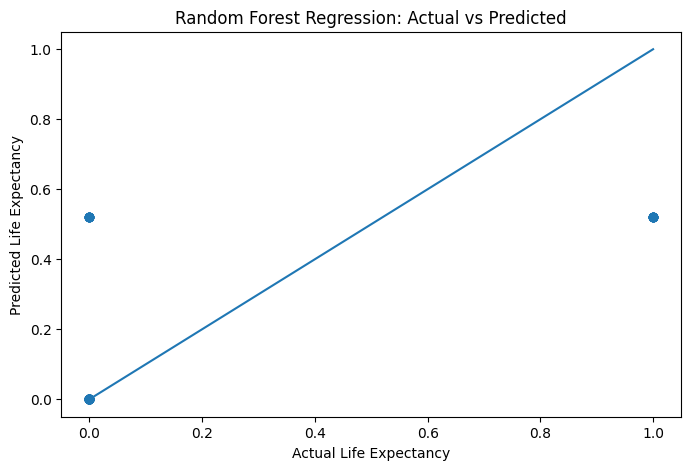

In [10]:
# ======================================================
# 6. PLOT PERBANDINGAN PREDIKSI VS AKTUAL
# ======================================================
plt.figure(figsize=(8,5))
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.title("Random Forest Regression: Actual vs Predicted")

# garis y=x
x_line = np.linspace(min(y_test), max(y_test), 100)
plt.plot(x_line, x_line)

plt.show()


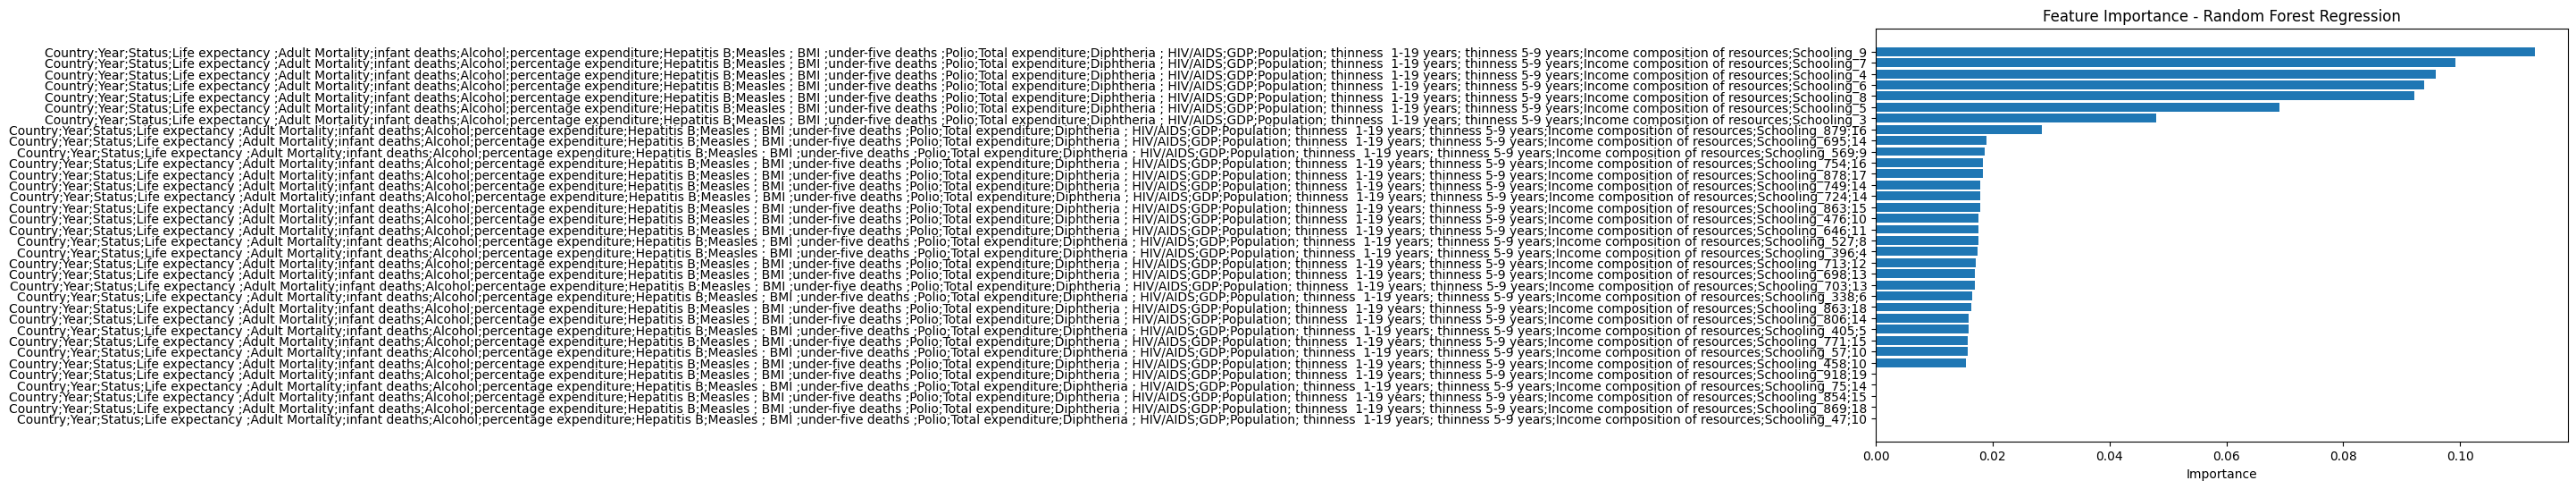

In [11]:
# ======================================================
# 7. FEATURE IMPORTANCE (FITUR PALING BERPENGARUH)
# ======================================================
importances = model.feature_importances_
feature_names = X.columns

# Urutkan
sorted_idx = np.argsort(importances)

plt.figure(figsize=(10,6))
plt.barh(feature_names[sorted_idx], importances[sorted_idx])
plt.title("Feature Importance - Random Forest Regression")
plt.xlabel("Importance")
plt.show()
